In [1]:
import os
import random
import h5py
import numpy as np
import torch
from PIL import Image
from scipy import ndimage
from scipy.ndimage.interpolation import zoom
from torch.utils.data import Dataset

/tmp/ipykernel_85573/3005682700.py:8: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import zoom


In [3]:
def make_coloured(image):
    coloured_image = np.zeros((512, 512, 3))
    for i in range(0, 512):
        for j in range(0, 512):
            if image[i][j] == 0:
                coloured_image[i][j][0] = 0
                coloured_image[i][j][1] = 0
                coloured_image[i][j][2] = 0
            elif image[i][j] == 1:
                coloured_image[i][j][0] = 1
                coloured_image[i][j][1] = 0
                coloured_image[i][j][2] = 0
            elif image[i][j] == 2:
                coloured_image[i][j][0] = 0
                coloured_image[i][j][1] = 1
                coloured_image[i][j][2] = 0
            elif image[i][j] == 3:
                coloured_image[i][j][0] = 0
                coloured_image[i][j][1] = 0
                coloured_image[i][j][2] = 1
            elif image[i][j] == 4:
                coloured_image[i][j][0] = 1
                coloured_image[i][j][1] = 1
                coloured_image[i][j][2] = 0
            elif image[i][j] == 5:
                coloured_image[i][j][0] = 1
                coloured_image[i][j][1] = 0
                coloured_image[i][j][2] = 1
            elif image[i][j] == 6:
                coloured_image[i][j][0] = 0
                coloured_image[i][j][1] = 1
                coloured_image[i][j][2] = 1
            elif image[i][j] == 7:
                coloured_image[i][j][0] = 1
                coloured_image[i][j][1] = 0
                coloured_image[i][j][2] = 0.5
            elif image[i][j] == 8:
                coloured_image[i][j][0] = 0
                coloured_image[i][j][1] = 0.5
                coloured_image[i][j][2] = 1
    return coloured_image



In [6]:
import nibabel as nib
import numpy as np
import os

def convert_nii_to_npy(nii_path, npy_path):
    if not os.path.exists(nii_path):
        raise FileNotFoundError(f"No file found at {nii_path}")

    # Load the NIfTI file
    nii_image = nib.load(nii_path)
    
    # Extract data from the NIfTI object
    image_data = nii_image.get_fdata()
    
    # Save the data to a .npy file
    np.save(npy_path, image_data)

def process_directory(source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)  # Create target directory if it doesn't exist

    # Loop through all files in the source directory
    for file_name in os.listdir(source_dir):
        if file_name.endswith('.nii.gz'):
            # Construct full file path
            nii_path = os.path.join(source_dir, file_name)
            # Construct target file path with the same base file name but with .npy extension
            npy_file_name = os.path.splitext(file_name)[0] + '.npy'
            npy_path = os.path.join(target_dir, npy_file_name)

            # Convert and save the file
            convert_nii_to_npy(nii_path, npy_path)
            print(f"Converted {file_name} to {npy_file_name}")


source_dir = '/home/manizam/Desktop/TransUNet/predictions/TU_Synapse224/TU_pretrain_R50-ViT-B_16_skip3_epo150_bs8_224'
target_dir = '/home/manizam/Desktop/TransUNet/predictions/TU_Synapse224/TU_pretrain_R50-ViT-B_16_skip3_epo150_bs8_224/npy_files'

process_directory(source_dir, target_dir)


Converted case0022_gt.nii.gz to case0022_gt.nii.npy
Converted case0025_pred.nii.gz to case0025_pred.nii.npy
Converted case0029_img.nii.gz to case0029_img.nii.npy
Converted case0038_pred.nii.gz to case0038_pred.nii.npy
Converted case0035_gt.nii.gz to case0035_gt.nii.npy
Converted case0003_pred.nii.gz to case0003_pred.nii.npy
Converted case0038_img.nii.gz to case0038_img.nii.npy
Converted case0025_img.nii.gz to case0025_img.nii.npy
Converted case0002_img.nii.gz to case0002_img.nii.npy
Converted case0032_pred.nii.gz to case0032_pred.nii.npy
Converted case0003_gt.nii.gz to case0003_gt.nii.npy
Converted case0008_img.nii.gz to case0008_img.nii.npy
Converted case0004_img.nii.gz to case0004_img.nii.npy
Converted case0003_img.nii.gz to case0003_img.nii.npy
Converted case0022_pred.nii.gz to case0022_pred.nii.npy
Converted case0036_pred.nii.gz to case0036_pred.nii.npy
Converted case0032_img.nii.gz to case0032_img.nii.npy
Converted case0008_gt.nii.gz to case0008_gt.nii.npy
Converted case0035_pred.

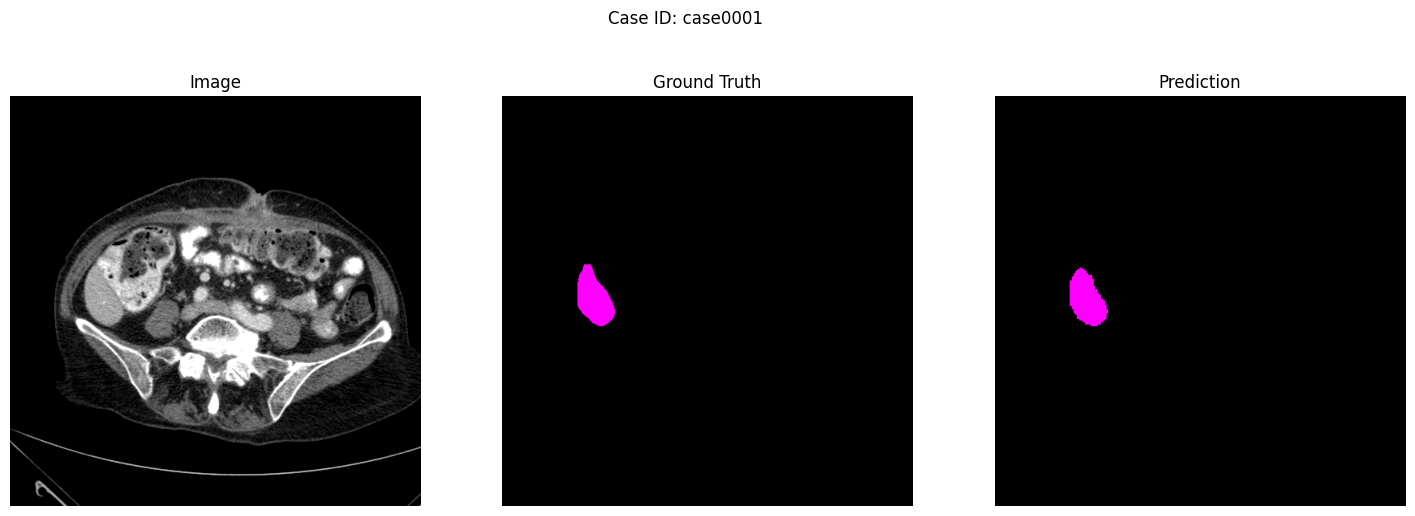

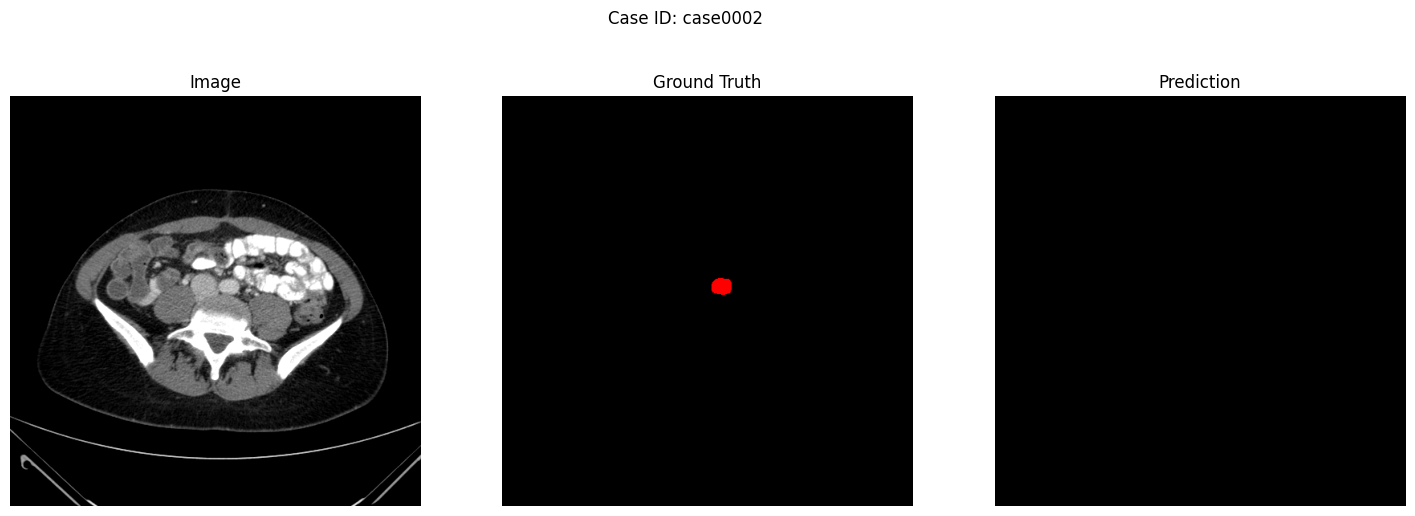

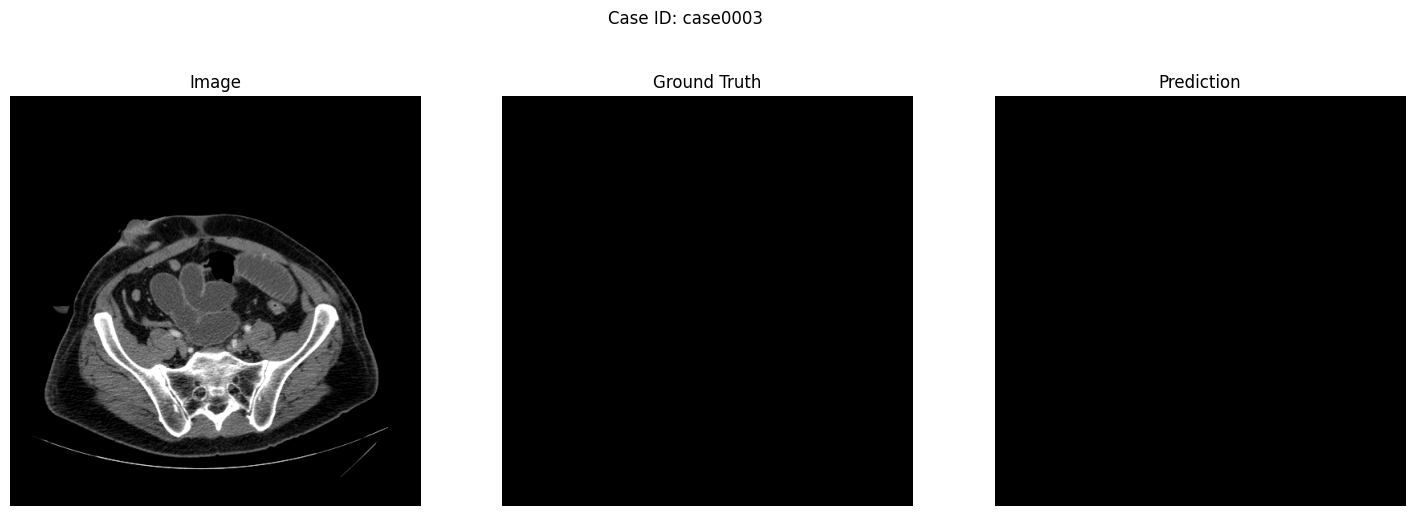

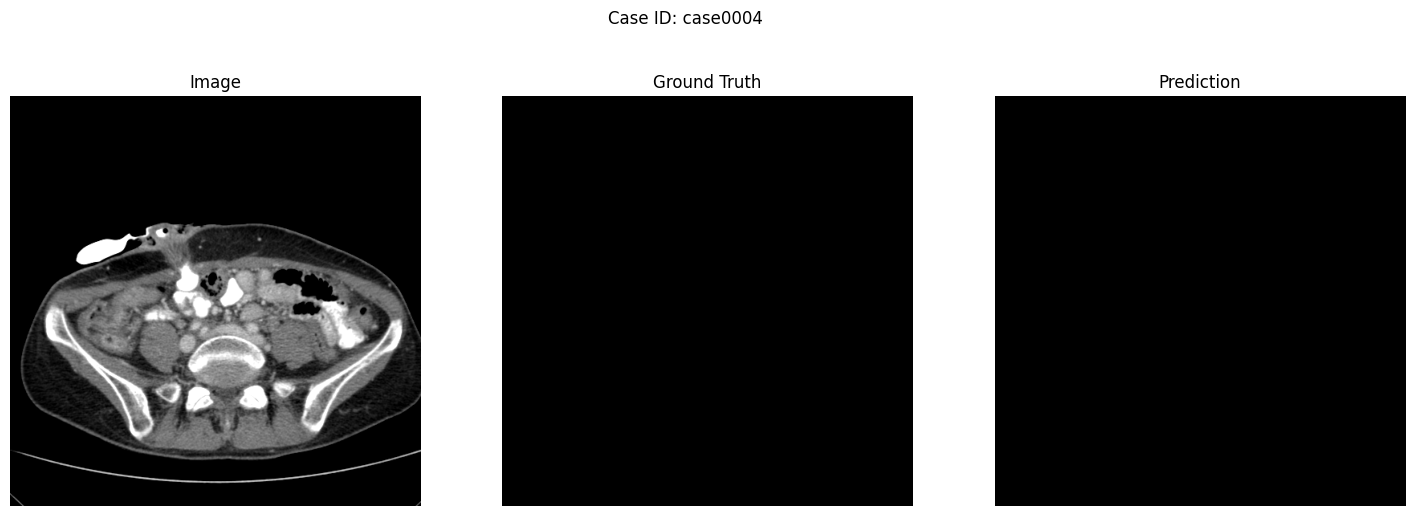

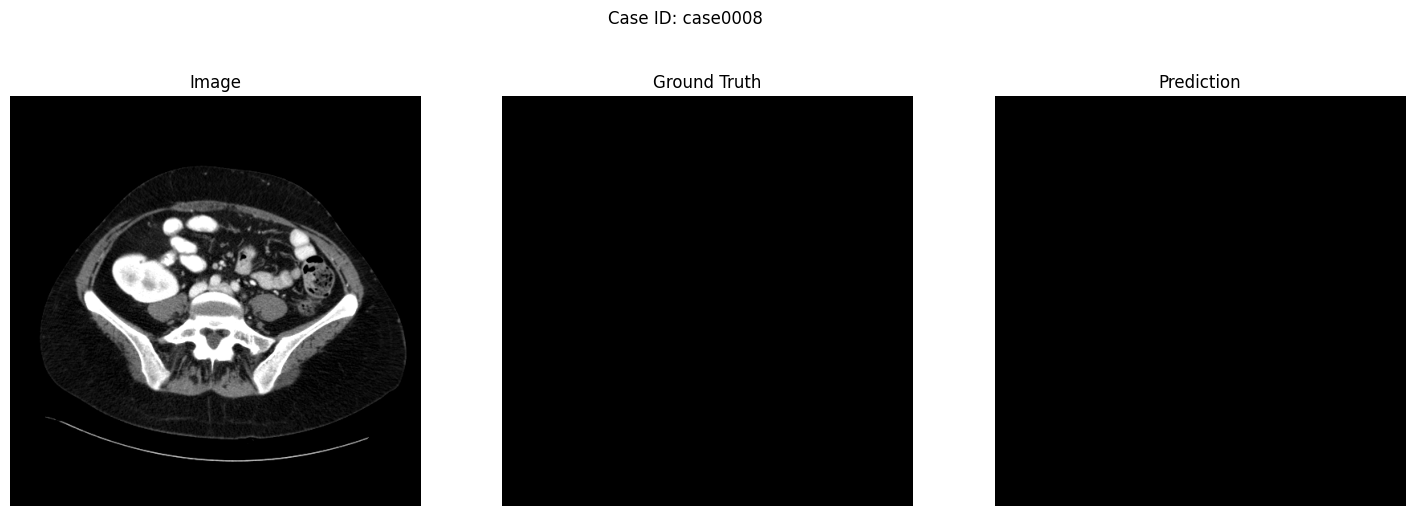

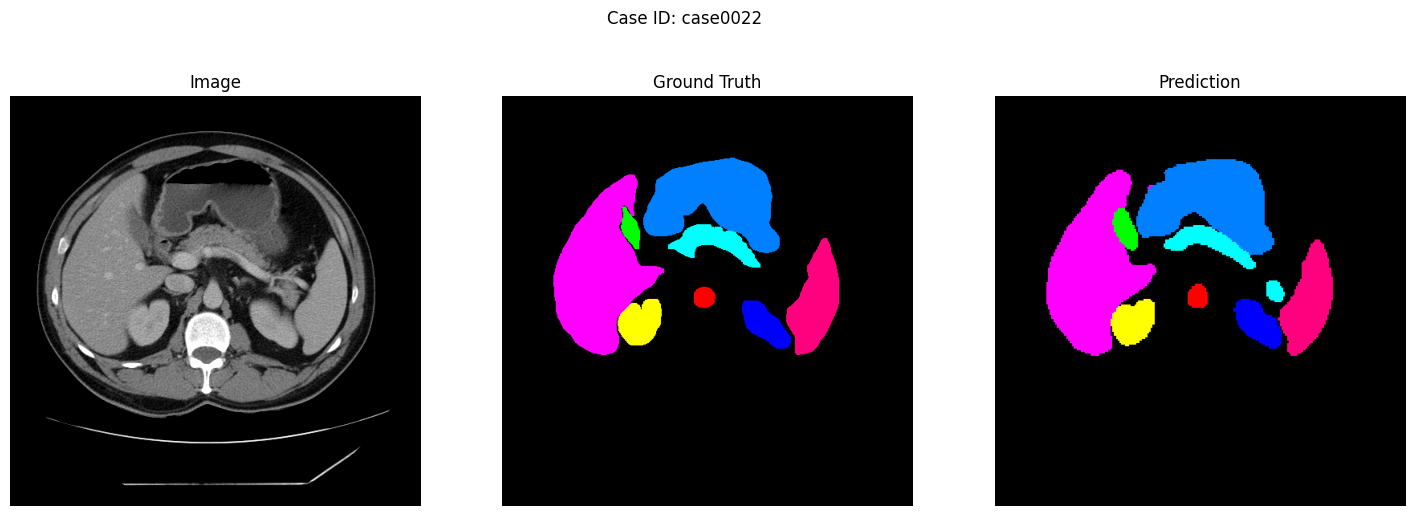

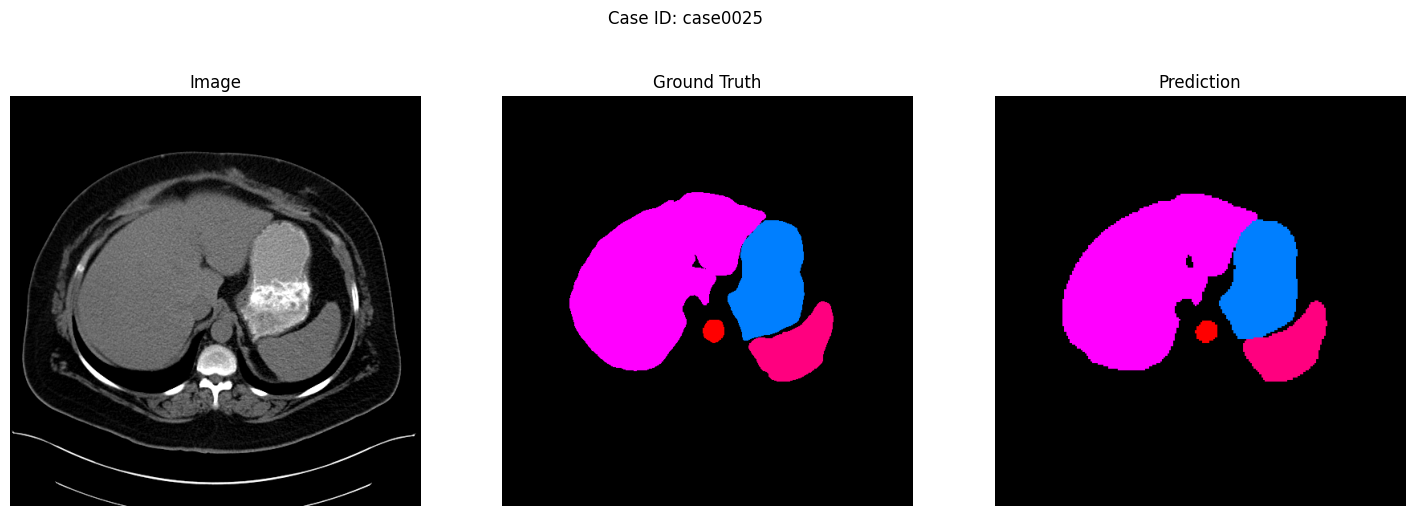

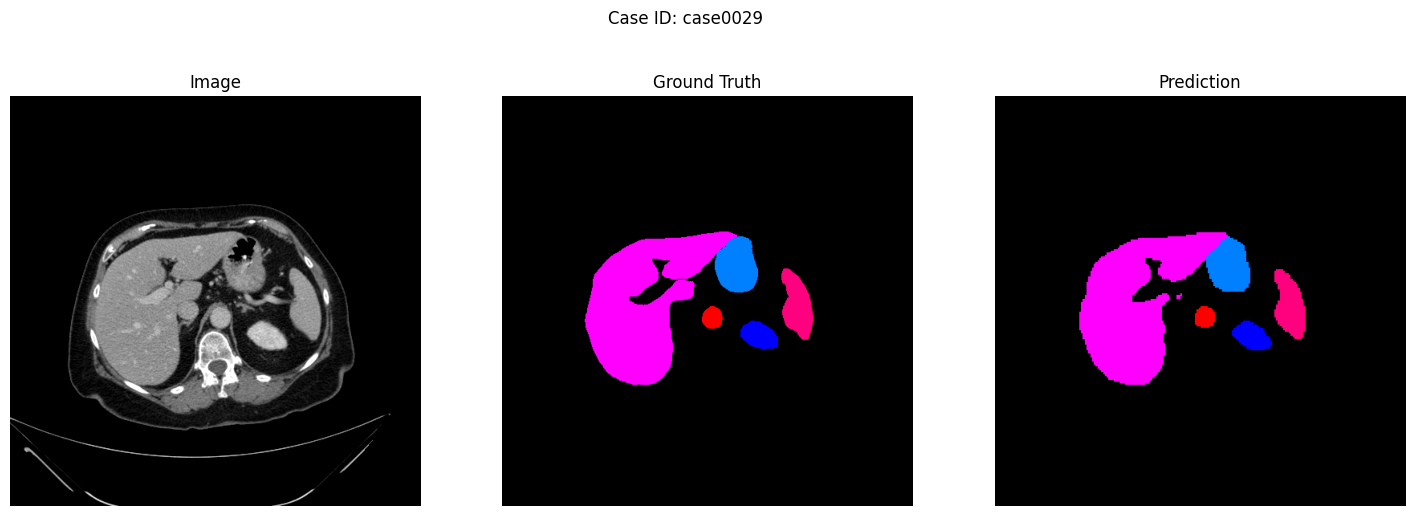

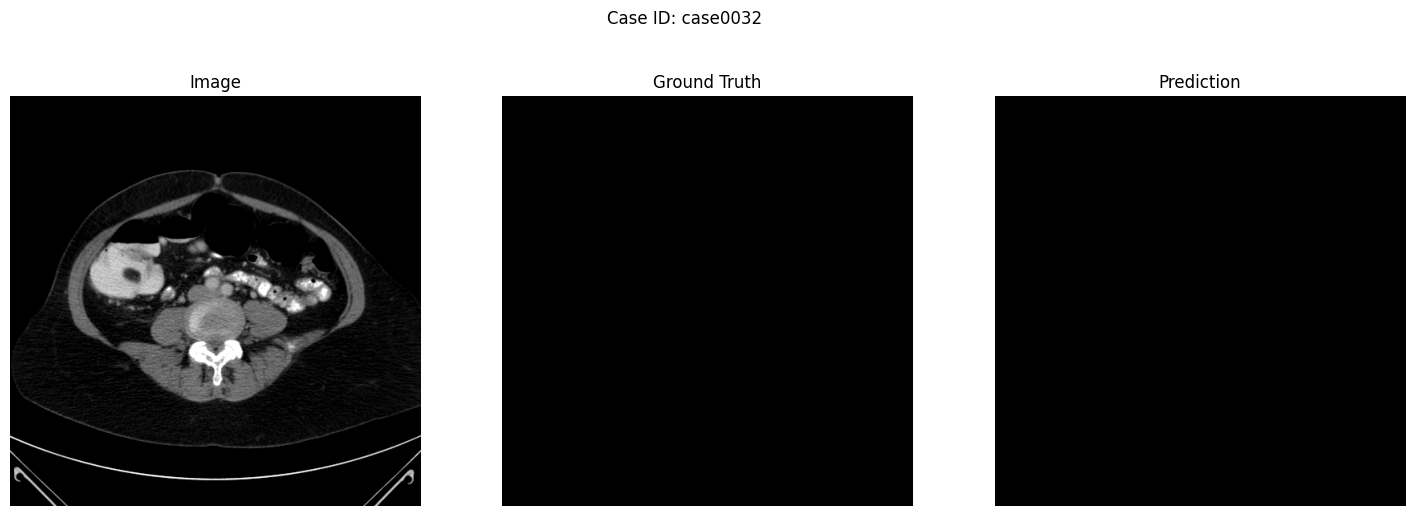

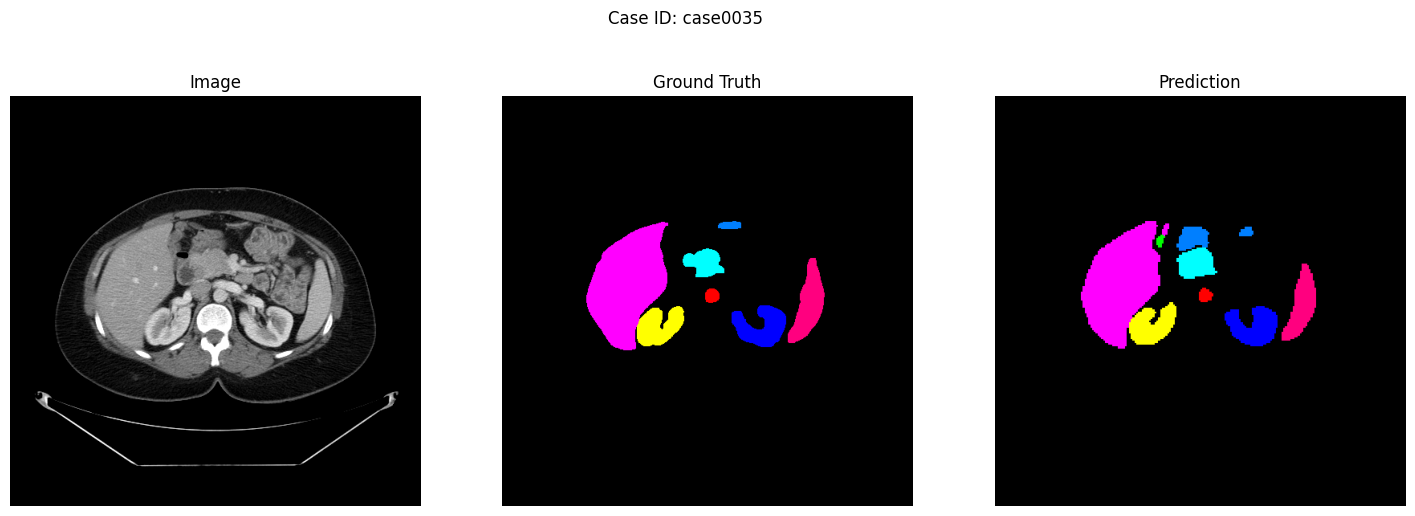

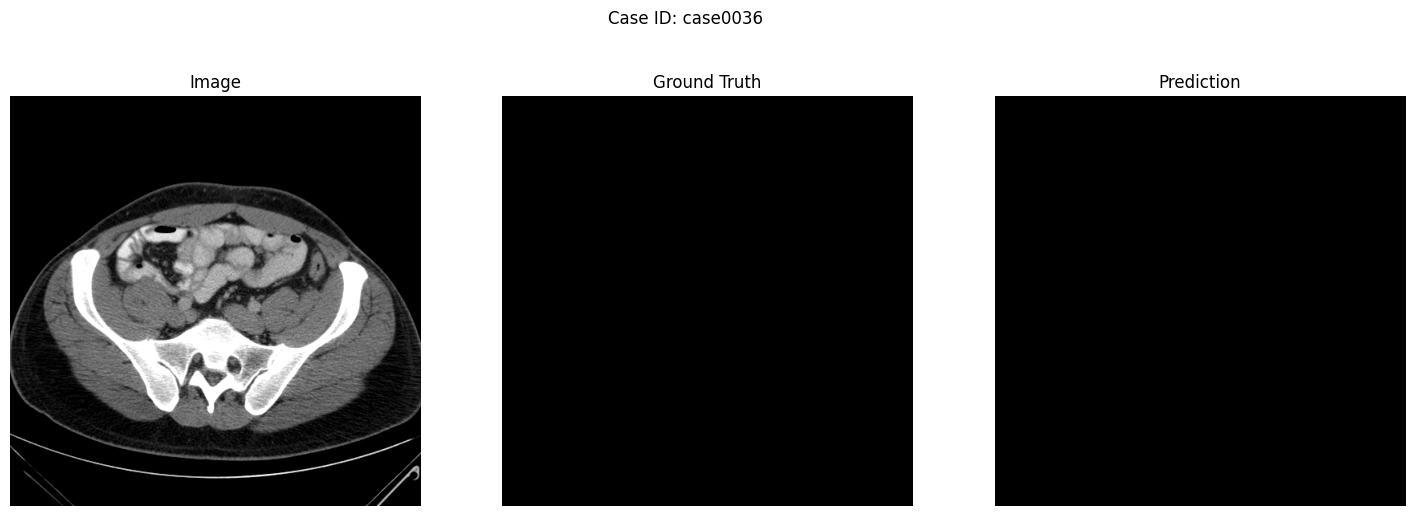

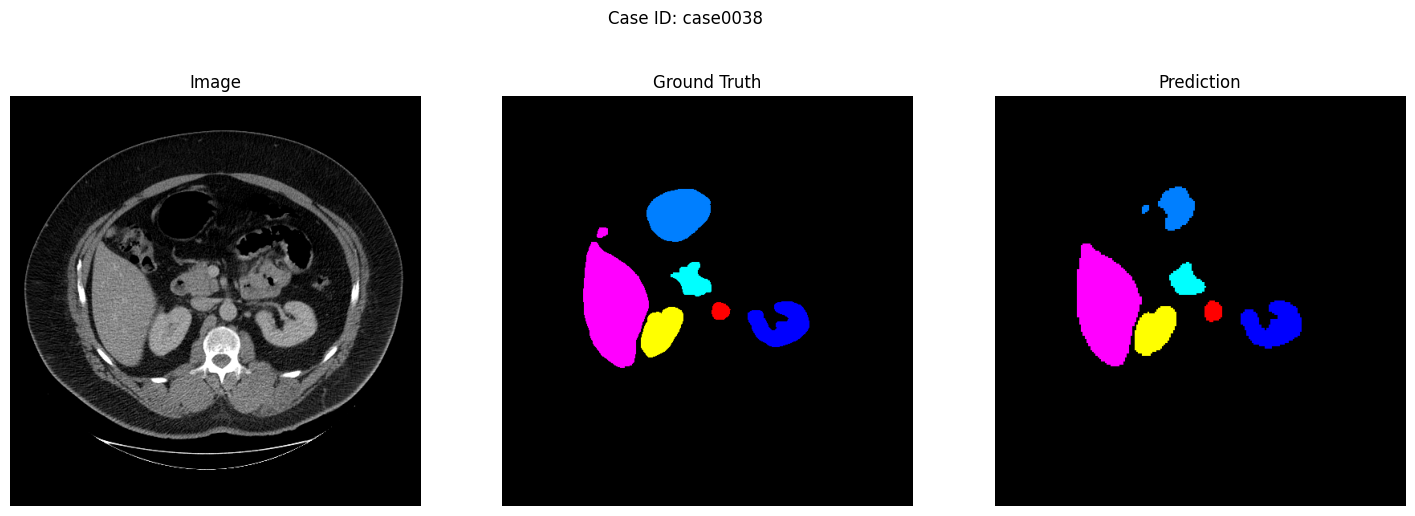

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

def make_coloured(image, slice_index):
    slice_2d = image[:, :, slice_index]
    coloured_image = np.zeros((slice_2d.shape[0], slice_2d.shape[1], 3))
    for i in range(slice_2d.shape[0]):
        for j in range(slice_2d.shape[1]):
            val = int(slice_2d[i, j])
            if val == 0:
                coloured_image[i, j] = [0, 0, 0]
            elif val == 1:
                coloured_image[i, j] = [1, 0, 0]
            elif val == 2:
                coloured_image[i, j] = [0, 1, 0]
            elif val == 3:
                coloured_image[i, j] = [0, 0, 1]
            elif val == 4:
                coloured_image[i, j] = [1, 1, 0]
            elif val == 5:
                coloured_image[i, j] = [1, 0, 1]
            elif val == 6:
                coloured_image[i, j] = [0, 1, 1]
            elif val == 7:
                coloured_image[i, j] = [1, 0, 0.5]
            elif val == 8:
                coloured_image[i, j] = [0, 0.5, 1]
    return coloured_image

def load_image(file_path, slice_index, color=True):
    data = np.load(file_path)
    if color:
        coloured_slice = make_coloured(data, slice_index)
        return Image.fromarray((coloured_slice * 255).astype(np.uint8))
    else:
        slice_2d = data[:, :, slice_index]
        return Image.fromarray((slice_2d * 255).astype(np.uint8), mode='L')

def display_images_for_case(case_id, base_dir, slice_index):
    img_path = os.path.join(base_dir, f'{case_id}_img.nii.npy')
    gt_path = os.path.join(base_dir, f'{case_id}_gt.nii.npy')
    pred_path = os.path.join(base_dir, f'{case_id}_pred.nii.npy')

    img = load_image(img_path, slice_index, color=False)
    gt = load_image(gt_path, slice_index, color=True)
    pred = load_image(pred_path, slice_index, color=True)

    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gt)
    plt.title('Ground Truth')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(pred)
    plt.title('Prediction')
    plt.axis('off')

    plt.suptitle(f'Case ID: {case_id}')
    plt.show()

def process_all_cases(base_dir, slice_index):
    case_ids = set()
    for filename in os.listdir(base_dir):
        if '_pred.nii.npy' in filename:
            case_id = filename.split('_pred.nii.npy')[0]
            case_ids.add(case_id)

    for case_id in sorted(case_ids):
        display_images_for_case(case_id, base_dir, slice_index)


base_dir = '/home/manizam/Desktop/TransUNet/predictions/TU_Synapse224/TU_pretrain_R50-ViT-B_16_skip3_epo150_bs8_224/npy_files'
slice_index = 67  # any specific slice you are interested in
process_all_cases(base_dir, slice_index)
